# Word_Embedding_model 

# Data Prep

In [1]:
import pandas as pd

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import sklearn.model_selection as cv
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [2]:
train_y = pd.read_csv("C:/Users/wanyi/Desktop/Uchicago/Kaggle projects/Toxic Comments/Word Embedding (pre-model)/train_clean.csv")
train_x = pd.read_csv("C:/Users/wanyi/Desktop/Uchicago/Kaggle projects/Toxic Comments/Word Embedding (pre-model)/train_splitted.csv")

In [3]:
column_name = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]
y = train_y.loc[:,column_name]
x = train_x.drop(columns=["Unnamed: 0"])
df = pd.concat([x,y], axis = 1)
df.shape

(159571, 206)

In [4]:
# Splitting train to validation 
y=df.loc[:,column_name]
x=df.iloc[:,range(200)]
(x_train, x_test, y_train, y_test)= cv.train_test_split(x, y, test_size=.20)

In [5]:
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
84210,0,0,0,0,0,0
112297,0,0,0,0,0,0
43958,0,0,0,0,0,0
109501,1,0,0,0,0,0
130035,1,0,1,0,1,0
...,...,...,...,...,...,...
88600,0,0,0,0,0,0
14420,0,0,0,0,0,0
11535,0,0,0,0,0,0
113512,0,0,0,0,0,0


# Checking feature importance

In [16]:
'''

from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor()
clf.fit(x_train, y_train)
importantscores=dict(zip(x_train.columns,clf.feature_importances_))
x = importantscores
import matplotlib.pyplot as plt
plot={k: v for k, v in sorted(x.items(), key=lambda item: item[1])[::-1]}

'''

C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


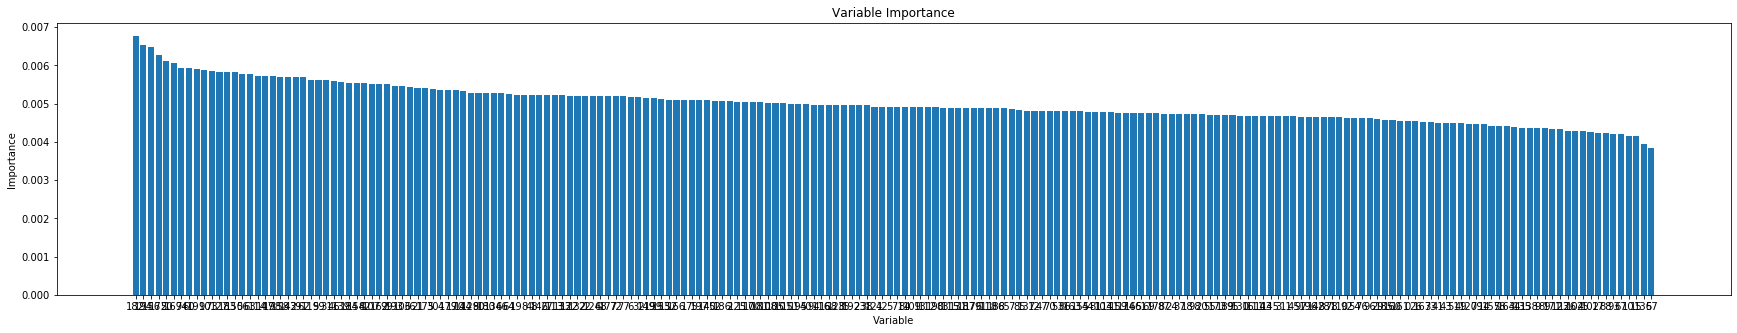

In [17]:
'''

plt.rcParams["figure.figsize"] = (30,5)
feature=list(plot.keys())[:200]
importance=list(plot.values())[:200]
plt.bar(feature, importance)
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Variable Importance')

plt.show()

'''

# Model steps:

1) OneVsRest Wrapper: 
    * KNN Classifier 
    * RandomForestClassifer
    * LogisticRegression
    
2) ClassifierChain Wrapper: 
    * KNN Classifier 
    * RandomForestClassifer
    * LogisticRegression 
    
3) ML-KNN Wrapper:   

# 3 wrapper methods with 3 classifier models

In [8]:
'''
# Using pipeline for applying logistic regression and one vs rest classifier
categories = column_name
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, y_train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(y_test[category], prediction)))
    print("\n")
''' 

**Processing toxic comments...**
Test accuracy is 0.9044336518878271


**Processing severe_toxic comments...**
Test accuracy is 0.9899107002976657


**Processing obscene comments...**
Test accuracy is 0.9485508381638728


**Processing threat comments...**
Test accuracy is 0.9969920100266333


**Processing insult comments...**
Test accuracy is 0.9513394955350148


**Processing identity_hate comments...**
Test accuracy is 0.9908506971643428




In [7]:
# OnevsRest

categories = column_name
models = [KNeighborsClassifier,RandomForestClassifier,LogisticRegression]

for model in models:
    score_list_one = []
    for category in categories:
        pip = OneVsRestClassifier(model()).fit(x_train,y_train[category])
        prediction = pip.predict(x_test)
        score_list_one.append(dict(model_name = model, auc = roc_auc_score(y_test[category], prediction)))
    print(score_list_one)

print("OnevsRest successfully completed")

[{'model_name': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'auc': 0.4990072458490088}, {'model_name': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'auc': 0.5}, {'model_name': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'auc': 0.4997987832344331}, {'model_name': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'auc': 0.5}, {'model_name': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'auc': 0.49954381567908857}, {'model_name': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'auc': 0.5}]


C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

[{'model_name': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'auc': 0.5002040277050821}, {'model_name': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'auc': 0.5}, {'model_name': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'auc': 0.5001064618222989}, {'model_name': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'auc': 0.5}, {'model_name': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'auc': 0.5001040582311581}, {'model_name': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'auc': 0.5}]


C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

[{'model_name': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'auc': 0.5}, {'model_name': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'auc': 0.5}, {'model_name': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'auc': 0.5}, {'model_name': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'auc': 0.5}, {'model_name': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'auc': 0.5}, {'model_name': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'auc': 0.5}]
OnevsRest successfully completed


In [7]:
# using classifier chains
# "average" = "None, binary, micro, macro, weighted" is required for multiclass/multilabel targets. 

models = [KNeighborsClassifier,RandomForestClassifier,LogisticRegression]

score_list_chain = []
for model in models:
    classifier = ClassifierChain(model())
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)
    score_list_chain.append(dict(model_name = model, roc = roc_auc_score(y_test, predictions.todense(),average = "weighted")))
print(score_list_chain)

print("Classifier chain successfully completed")

C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

[{'model_name': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'roc': 0.49909153612809976}, {'model_name': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'roc': 0.49979573375422287}, {'model_name': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'roc': 0.5}]
Classifier chain successfully completed


In [8]:
classifier_new = MLkNN(k=10)
# Note that this classifier can throw up errors when handling sparse matrices.
x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()
# train
classifier_new.fit(x_train, y_train)
# predict
predictions_new = classifier_new.predict(x_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new.todense()))
print("Roc = ",roc_auc_score(y_test,predictions_new.todense(),average = "weighted"))
print("F1 = ",f1_score(y_test,predictions_new.todense(),average = "weighted"))
print("\n")

print("MLkNN successfully completed")

Accuracy =  0.8971016763277456
Roc =  0.4999431999616222
F1 =  0.0


MLkNN successfully completed


C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions_new.todense(),average = "weighted")

C:\Users\wanyi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions_new.todense())

ValueError: Found input variables with inconsistent numbers of samples: [31915, 1]